
# DNN으로 MOON 문제 풀기

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import sklearn

(600,)


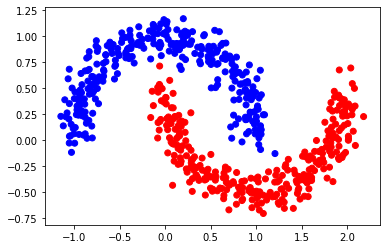

In [48]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=600, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

In [43]:
x_data.shape

(600, 2)

# 1.내가 만든 모델

In [49]:
# 다층 신경망
model = Sequential()
model.add(Dense(5, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(10, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(5, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [50]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam')

In [51]:
model.fit(x_data, y_data, batch_size = 1000, epochs = 2000, verbose = 0)
y_pred= model.predict(x_data)

# 답이 0, 1,1, 0이 나와야 함.
# 한번 실행 후, 또 실행하면 학습한 결과로부터 또 학습 시작함.


(900, 2)
<class 'numpy.ndarray'>
(900, 1)


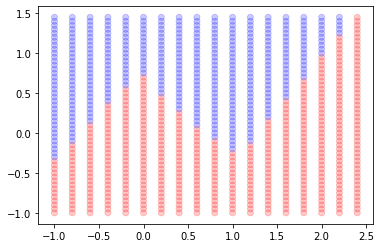

In [53]:
xx, yy = np.mgrid[-1:2.5:0.2, -1:1.5:0.05]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

# plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

# 2. 강사님 답안

In [58]:
model = Sequential([
    Dense(5, activation = 'sigmoid', input_dim = 2),
    Dense(5, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer = Adam(0.01))
model.fit(x_data, y_data, batch_size = 100, epochs = 3000, verbose = 0,
         validation_data = (x_data, y_data))

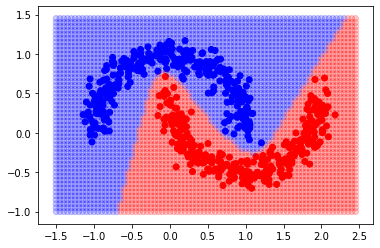

In [59]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

# 3. verbose = 1 -> epoch 할때마다 나옴

## 3.1. LambdaCallback
- epoch마다 출력하는 것을 제어할 수 있음.


In [105]:
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping

In [120]:

def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step))


In [121]:
# 다층 신경망
model = Sequential()
model.add(Dense(5, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [122]:
model.compile(loss='binary_crossentropy', optimizer="adam")  
model.fit(x_data, y_data, batch_size=100, epochs=500, verbose=0,
          validation_data=(x_data, y_data),
          callbacks=[printepoch(100)]
         )

# 답이 0, 1,1, 0이 나와야 함.
# 한번 실행 후, 또 실행하면 학습한 결과로부터 또 학습 시작함.


### compile할 때 matric을 사용하지 않으면. log정보에는 loss만 있음.

### 모델을 다시 만들지 않으면 초기화되지 않음.compile부터 다시 실행해도 됨

In [91]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [101]:
model.fit(x_data, y_data,
          batch_size = 1000, 
          epochs = 2000, 
          verbose = 0,  # lambdaCallback을 할 때는 0으로 넣기
         callbacks = [printepoch(500)])


# 4. LeakyReLU적용하기

In [123]:
from keras.layers import LeakyReLU

In [124]:
# 다층 신경망
model = Sequential([
    Dense(5,activation = LeakyReLU(alpha=0.1), input_dim=2),
    Dense(10,activation = LeakyReLU(alpha=0.1)),
    Dense(10,activation = LeakyReLU(alpha=0.1)),
    Dense(10,activation = LeakyReLU(alpha=0.1)),
    Dense(10,activation = LeakyReLU(alpha=0.1)),
    Dense(10,activation = LeakyReLU(alpha=0.1)),
    Dense(1,activation = 'sigmoid'),    
])

In [126]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.fit(x_data, y_data,
          batch_size = 1000, 
          epochs = 2000, 
          verbose = 0,  # lambdaCallback을 할 때는 0으로 넣기
         callbacks = [printepoch(50)])

##### activation함수를 다른 것을 사용할 경우
- weight변화가 새기므로 학습이 가능
- 레이어를 깊에 쌓을 수 있음.

> sigmoid
- 미분값의 변화가 0인 경우 w의 updata가 잘 안됨.
- 학습이 안되는 문제 발생
